In [8]:
import os
import numpy as np
import keras
from keras.models import model_from_yaml

model_path = "../models/"
model = model_from_yaml(open(os.path.join(model_path, "model_storedata_15stores_mse_1layer_dropout.yaml")).read())


In [12]:
model.load_weights(os.path.join(model_path, "model_storedata_15stores_mse_1layer_dropout_weights.hd5"))
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

In [3]:
import pandas as pd
from pandas import HDFStore

data_dir = "../data/"
hdf = HDFStore(os.path.join(data_dir, "data_15_stores.hd5"))

In [6]:
store_data = hdf['store_data']
stores = store_data['Store'].unique()

input_features = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'WeekOfYear', 'Year']

output_features_openonly = ['SalesNormOpenOnly', 'CustomersNormOpenOnly']
output_features = ['SalesNorm', 'CustomersNorm']

store_features = ['StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionMonthsSinceOpen',
                  'Promo2', 'Promo2WeeksSinceJoined', 'StoreNorm']

train_features_full = ['SalesNorm', 'CustomersNorm', 'Open', 'DayOfWeek',
                       'Promo', 'StateHoliday', 'SchoolHoliday', 'WeekOfYear']


In [13]:
batch_size = 32

train_inputs = hdf['train_data'][input_features]\
                   .loc[hdf['train_data']['Store'] == 1022]\
                   .as_matrix()

store_inputs = hdf['store_data'][store_features]\
                   .loc[hdf['store_data']['Store'] == 1022]\
                   .as_matrix()

train_inputs = np.append(np.repeat(store_inputs, len(train_inputs), axis=0),
                         train_inputs, axis=1)

train_inputs = train_inputs.reshape(train_inputs.shape + (1,))

train_outputs = hdf['train_data'][output_features]\
                       .loc[hdf['train_data']['Store'] == 1022]\
                       .as_matrix()
print('\n\nStore: ' + str(45) + '\n')
history = model.fit(train_inputs[:753], train_outputs[:753], batch_size=batch_size, nb_epoch=10)
predictions = model.predict(train_inputs[753:])



Store: 45

Epoch 1/10
753/753 [==============================] - 28s - loss: 0.0050 - acc: 0.6481    
Epoch 2/10
753/753 [==============================] - 28s - loss: 0.0022 - acc: 0.6972    
Epoch 3/10
753/753 [==============================] - 27s - loss: 0.0021 - acc: 0.7105    
Epoch 4/10
753/753 [==============================] - 27s - loss: 0.0018 - acc: 0.7238    
Epoch 5/10
753/753 [==============================] - 27s - loss: 0.0014 - acc: 0.7065    
Epoch 6/10
753/753 [==============================] - 27s - loss: 9.5373e-04 - acc: 0.7065    
Epoch 7/10
753/753 [==============================] - 27s - loss: 0.0016 - acc: 0.7238    
Epoch 8/10
753/753 [==============================] - 26s - loss: 0.0011 - acc: 0.7052    
Epoch 9/10
753/753 [==============================] - 26s - loss: 0.0012 - acc: 0.7065    
Epoch 10/10
753/753 [==============================] - 25s - loss: 0.0012 - acc: 0.7158    


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

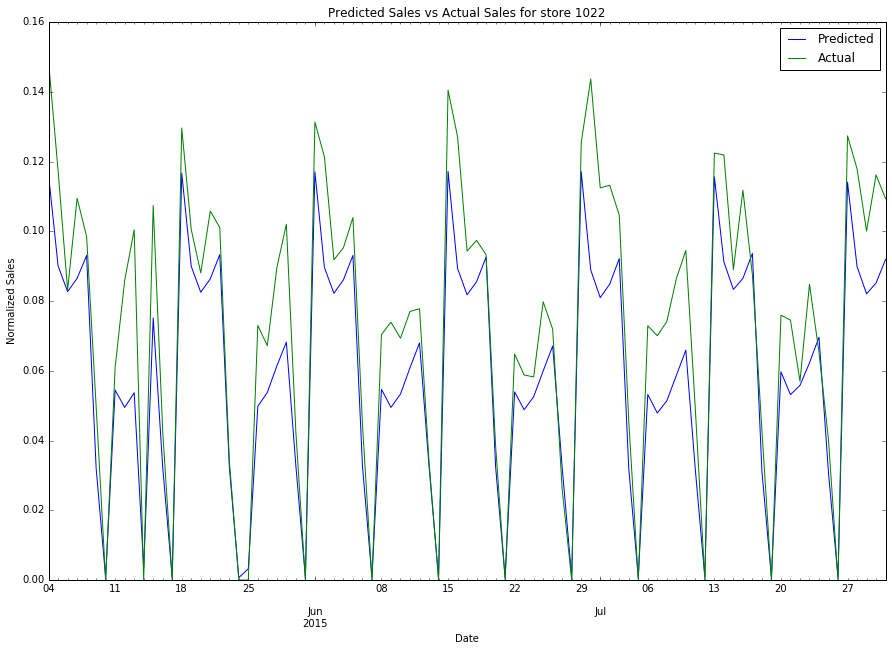

In [31]:
result = pd.DataFrame({'Date' : hdf['train_data']['Date'].loc[hdf['train_data']['Store'] == 1022][853:],
                       'Predicted' : predictions[100:, 0],
                       'Actual' : train_outputs[853:][:, 0]})
result.plot("Date", ["Predicted", "Actual"], figsize=(15, 10))
plt.title('Predicted Sales vs Actual Sales for store 1022')
plt.ylabel('Normalized Sales')
plt.show()

In [29]:
train_inputs = hdf['train_data'][input_features]\
                   .loc[hdf['train_data']['Store'] == 307]\
                   .as_matrix()

store_inputs = hdf['store_data'][store_features]\
                   .loc[hdf['store_data']['Store'] == 307]\
                   .as_matrix()

train_inputs = np.append(np.repeat(store_inputs, len(train_inputs), axis=0),
                         train_inputs, axis=1)

train_inputs = train_inputs.reshape(train_inputs.shape + (1,))

train_outputs = hdf['train_data'][output_features]\
                       .loc[hdf['train_data']['Store'] == 307]\
                       .as_matrix()
print('\n\nStore: ' + str(45) + '\n')
history = model.fit(train_inputs[:753], train_outputs[:753], batch_size=batch_size, nb_epoch=10)
predictions = model.predict(train_inputs[753:])



Store: 45

Epoch 1/10
753/753 [==============================] - 23s - loss: 0.0014 - acc: 0.6361    
Epoch 2/10
753/753 [==============================] - 24s - loss: 4.4466e-04 - acc: 0.6375    
Epoch 3/10
753/753 [==============================] - 24s - loss: 4.3748e-04 - acc: 0.6560    
Epoch 4/10
753/753 [==============================] - 23s - loss: 3.1838e-04 - acc: 0.6760    
Epoch 5/10
753/753 [==============================] - 23s - loss: 3.1830e-04 - acc: 0.6813    
Epoch 6/10
753/753 [==============================] - 25s - loss: 3.0970e-04 - acc: 0.6853    
Epoch 7/10
753/753 [==============================] - 30s - loss: 2.9499e-04 - acc: 0.6839    
Epoch 8/10
753/753 [==============================] - 28s - loss: 2.9389e-04 - acc: 0.6932    
Epoch 9/10
753/753 [==============================] - 30s - loss: 3.2164e-04 - acc: 0.7211    
Epoch 10/10
753/753 [==============================] - 26s - loss: 2.7847e-04 - acc: 0.7039    


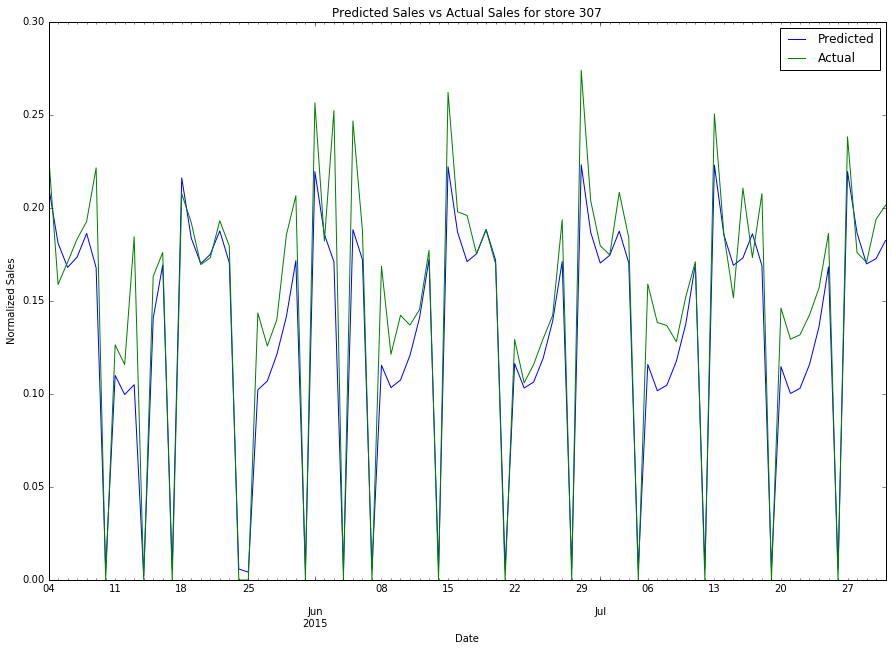

In [47]:
result = pd.DataFrame({'Date' : hdf['train_data']['Date'].loc[hdf['train_data']['Store'] == 1022][853:],
                       'Predicted' : predictions[100:, 0],
                       'Actual' : train_outputs[853:][:, 0]})
result.plot("Date", ["Predicted", "Actual"], figsize=(15, 10))
plt.title('Predicted Sales vs Actual Sales for store 307')
plt.ylabel('Normalized Sales')
plt.show()

In [35]:
train_inputs = hdf['train_data'][input_features]\
                   .loc[hdf['train_data']['Store'] == 45]\
                   .as_matrix()

store_inputs = hdf['store_data'][store_features]\
                   .loc[hdf['store_data']['Store'] == 45]\
                   .as_matrix()

train_inputs = np.append(np.repeat(store_inputs, len(train_inputs), axis=0),
                         train_inputs, axis=1)

train_inputs = train_inputs.reshape(train_inputs.shape + (1,))

train_outputs = hdf['train_data'][output_features]\
                       .loc[hdf['train_data']['Store'] == 45]\
                       .as_matrix()
print('\n\nStore: ' + str(45) + '\n')
history = model.fit(train_inputs[:753], train_outputs[:753], batch_size=batch_size, nb_epoch=5)
predictions = model.predict(train_inputs[753:])



Store: 45

Epoch 1/5
753/753 [==============================] - 25s - loss: 0.0015 - acc: 0.9641    
Epoch 2/5
753/753 [==============================] - 27s - loss: 9.4737e-04 - acc: 0.9907    
Epoch 3/5
753/753 [==============================] - 26s - loss: 5.6607e-04 - acc: 0.9960    
Epoch 4/5
753/753 [==============================] - 26s - loss: 6.7289e-04 - acc: 0.9907    
Epoch 5/5
753/753 [==============================] - 25s - loss: 5.4301e-04 - acc: 0.9920    


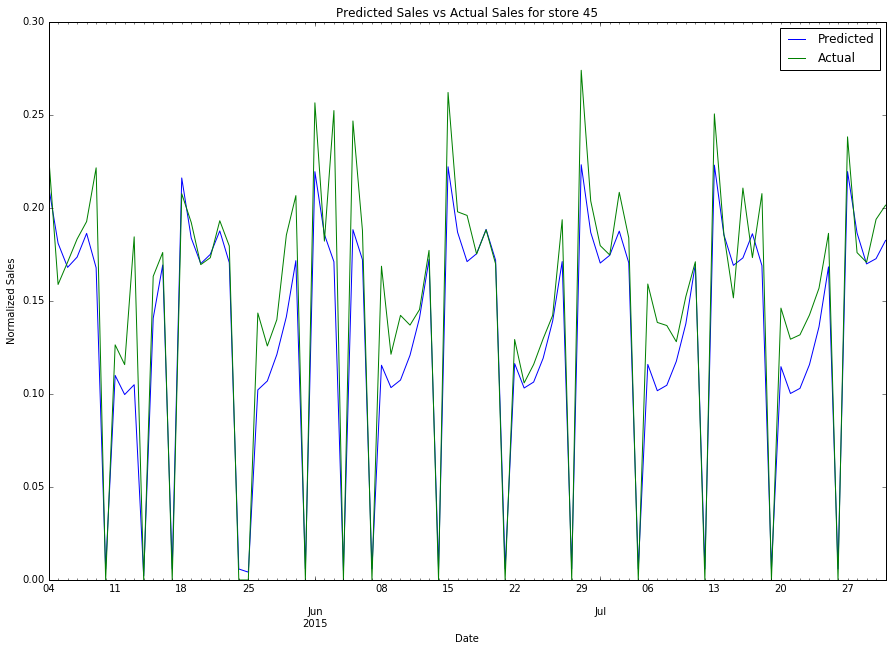

In [36]:
result = pd.DataFrame({'Date' : hdf['train_data']['Date'].loc[hdf['train_data']['Store'] == 1022][853:],
                       'Predicted' : predictions[100:, 0],
                       'Actual' : train_outputs[853:][:, 0]})
result.plot("Date", ["Predicted", "Actual"], figsize=(15, 10))
plt.title('Predicted Sales vs Actual Sales for store 45')
plt.ylabel('Normalized Sales')
plt.show()

In [38]:
result.plot?